## Zomato Restaurant

#### Importing Libraries

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [521]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [522]:
df_Country = pd.read_excel(r"C:\Users\HP\Downloads\Country-Code (1).xlsx")
df_Country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [524]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [525]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

* Here **Restaurant Name** have out of 9500 records 7446 unique value and this not help in prediction.
* Also **Restaurant ID** not use in prediction than we can drop it too.

In [526]:
df.drop(["Restaurant ID","Restaurant Name"],axis=1,inplace=True)

In [527]:
df_Country["Country Code"].unique()

array([  1,  14,  30,  37,  94, 148, 162, 166, 184, 189, 191, 208, 214,
       215, 216], dtype=int64)

In [528]:
df["Country Code"].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [529]:
dataset = pd.merge(df, df_Country, on="Country Code")
dataset.head()

,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [530]:
dataset.nunique()

Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

* Switch to order menu have only one value we can drop it
* Address have 8918 than we can drop it

#### Data cleaning

In [531]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(9551, 20)

In [532]:
dataset.drop(["Address","Switch to order menu"],axis=1,inplace=True)

In [533]:
dataset["Locality"].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko\x81ôuyolu',
       'Kuruí_e\x81ôme', 'Moda'], dtype=object)

In [534]:
dataset["Locality Verbose"].unique()

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       ..., 'Ko\x81ôuyolu, ÛÁstanbul', 'Kuruí_e\x81ôme, ÛÁstanbul',
       'Moda, ÛÁstanbul'], dtype=object)

In [535]:
dataset["Locality Verbose"].groupby(dataset["Locality"]).size().reset_index()

,Locality,Locality Verbose
0,"ILD Trade Centre Mall, Sohna Road",2
1,"12th Square Building, Banjara Hills",1
2,"A Hotel, Gurdev Nagar",1
3,"ARSS Mall, Paschim Vihar",1
4,Aaya Nagar,1
...,...,...
1203,"ibis New Delhi, Aerocity",2
1204,íguas Claras,3
1205,íayyolu,1
1206,íukurambar,1


* Locality,	Cuisines and Locality Verbose have more than 1000 unique value and to conver encoding it increse dimensionality and model give us bed result

In [536]:
dataset.drop(["Locality Verbose","Locality","Cuisines"],axis=1,inplace=True)

In [537]:
dataset.head(2)

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [538]:
pd.crosstab(dataset["Aggregate rating"],dataset["Rating color"])

Rating color,Dark Green,Green,Orange,Red,White,Yellow
Aggregate rating,,,,,,
0.0,0,0,0,0,2148,0
1.8,0,0,0,1,0,0
1.9,0,0,0,2,0,0
2.0,0,0,0,7,0,0
2.1,0,0,0,15,0,0
2.2,0,0,0,27,0,0
2.3,0,0,0,47,0,0
2.4,0,0,0,87,0,0
2.5,0,0,110,0,0,0


* 2148 pepole not give any rating 
* Dark Green have reting between 4.5-4.9 Rating
* Green	have reting between 4.0-4.4 Rating
* Yellow have reting between 3.5-3.9 Rating
* Red have reting between 1.8-2.4 Rating
* White	have reting between No Rating
* Orange have reting between 2.5-3.4 Rating

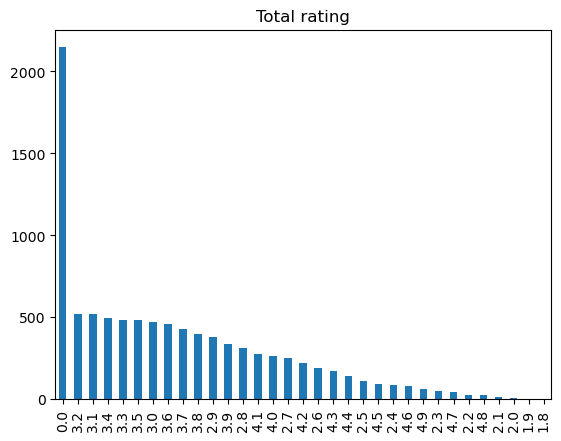

In [539]:
dataset["Aggregate rating"].value_counts().plot(kind="bar")
plt.title("Total rating")
plt.show()

<Axes: xlabel='Rating color', ylabel='count'>

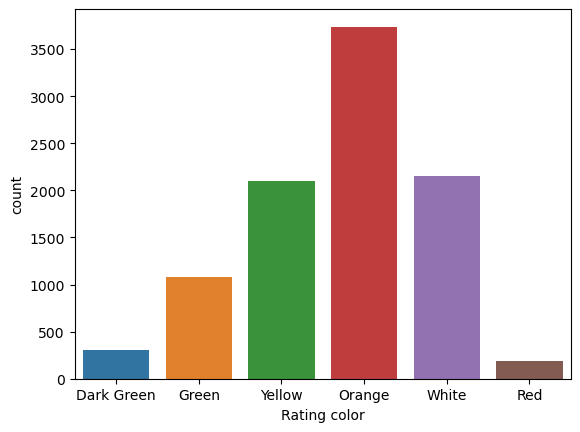

In [540]:
sns.countplot(data=dataset,x=dataset["Rating color"])

In [541]:
Rating_data=dataset.groupby(["Aggregate rating","Country"]).size().reset_index()


Rating_data = Rating_data.rename(columns={0: 'Count',"Aggregate rating":"Aggregate_rating"})
Rating_data.head(5)

,Aggregate_rating,Country,Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


* From **Rating color** and **Aggregate rating** most of rating between 2.5-3.4
* Most of **Indians** are not reting

In [542]:
dataset["Country"].value_counts() /len(dataset) * 100

India             90.587373
United States      4.544027
United Kingdom     0.837609
Brazil             0.628206
UAE                0.628206
South Africa       0.628206
New Zealand        0.418804
Turkey             0.355984
Australia          0.251283
Phillipines        0.230342
Indonesia          0.219872
Singapore          0.209402
Qatar              0.209402
Sri Lanka          0.209402
Canada             0.041880
Name: Country, dtype: float64

* Zomato have 90% order from india

In [543]:
pd.crosstab(dataset["Country"],dataset["Has Online delivery"])/len(dataset) * 100

Has Online delivery,No,Yes
Country,,
Australia,0.251283,0.000000
Brazil,0.628206,0.000000
Canada,0.041880,0.000000
India,65.218302,25.369071
Indonesia,0.219872,0.000000
New Zealand,0.418804,0.000000
Phillipines,0.230342,0.000000
Qatar,0.209402,0.000000
Singapore,0.209402,0.000000


#### India has 65% no Online delivery

In [544]:
dataset.shape

(9551, 15)

In [546]:
col_obj = dataset.select_dtypes("O").columns.tolist()
len(col_obj)

8

In [547]:
col_int = dataset.select_dtypes(np.number).columns.tolist()
len(col_int)

7

In [548]:
dataset.nunique()

Country Code              15
City                     141
Longitude               8120
Latitude                8677
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

##### Lebal encoding

In [549]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in ["Currency","City","Price range","Country"]:
    dataset[i] = lb.fit_transform(dataset[i])
    
dataset.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,121.027535,14.565443,1100,0,Yes,No,No,2,4.8,Dark Green,Excellent,314,6
1,162,73,121.014101,14.553708,1200,0,Yes,No,No,2,4.5,Dark Green,Excellent,591,6
2,162,75,121.056831,14.581404,4000,0,Yes,No,No,3,4.4,Green,Very Good,270,6
3,162,75,121.056475,14.585318,1500,0,No,No,No,3,4.9,Dark Green,Excellent,365,6
4,162,75,121.057508,14.584450,1500,0,Yes,No,No,3,4.8,Dark Green,Excellent,229,6


In [550]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [551]:
dataset.head(2)

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Price range,Aggregate rating,Votes,Country,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,73,121.027535,14.565443,1100,0,2,4.8,314,6,...,0,0,0,0,0,1,0,0,0,0
1,162,73,121.014101,14.553708,1200,0,2,4.5,591,6,...,0,0,0,0,0,1,0,0,0,0


In [552]:
dataset.shape

(9551, 23)

##### Vizulizing Outliers

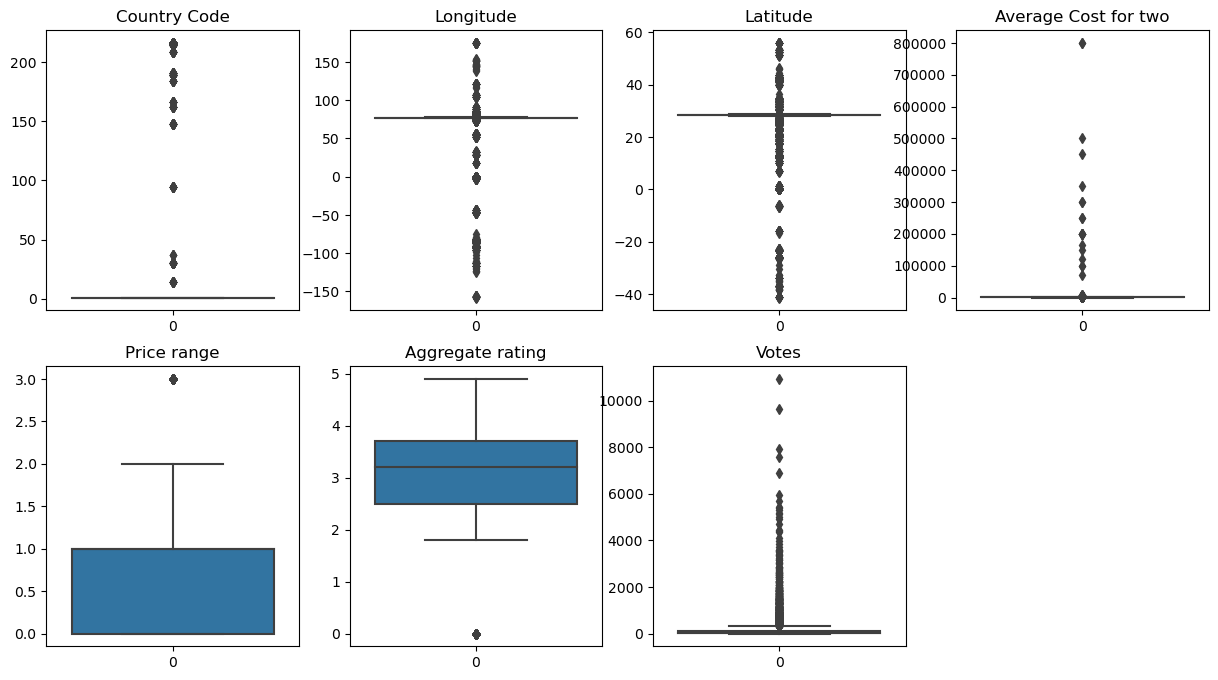

In [555]:
plt.figure(figsize=(15,8))
num = 1
for i in col_int:
    if num<=8:
        ax = plt.subplot(2,4,num)
        sns.boxplot(dataset[i])
        plt.title(i)
        num +=1
plt.show()

In [556]:
### Removing outliers
from scipy.stats import zscore

z = np.abs(zscore(dataset))

In [557]:
np.where(z>3)

(array([   0,    0,    1, ..., 9549, 9550, 9550], dtype=int64),
 array([ 5, 18,  5, ...,  5,  0,  5], dtype=int64))

In [558]:
dataset = dataset[(z<3).all(axis=1)]
dataset.shape

(8147, 23)

##### Vizulizing skewness

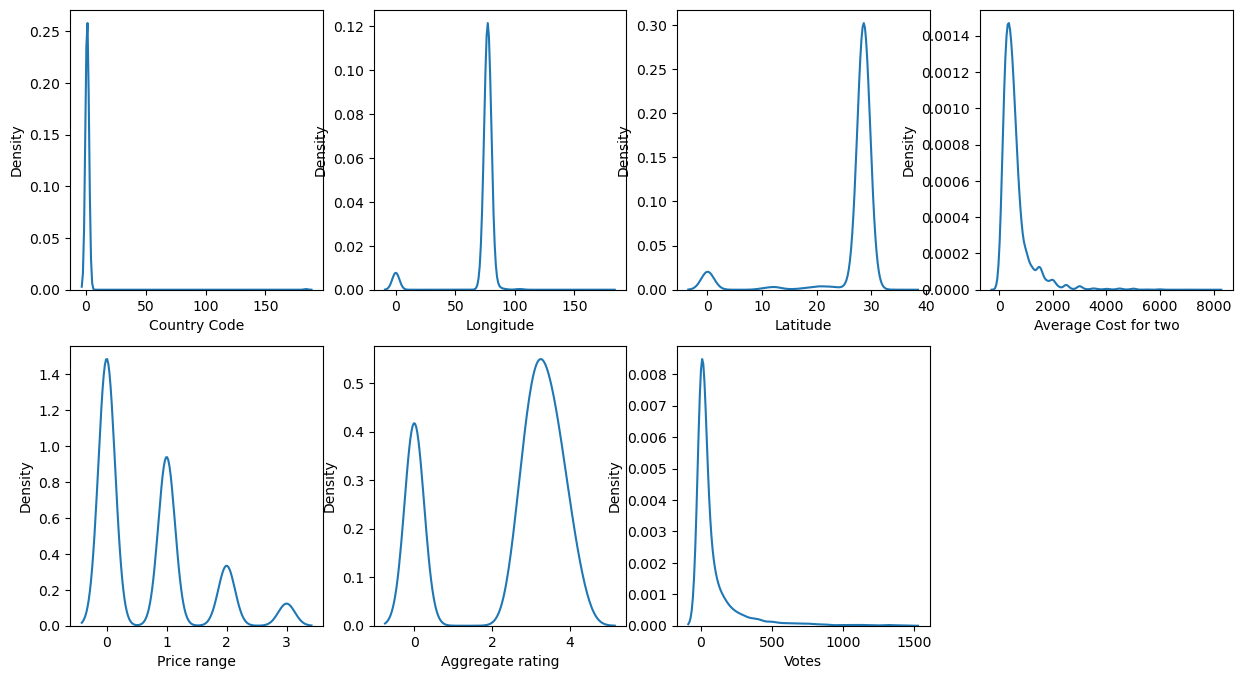

In [561]:
plt.figure(figsize=(15,8))
num = 1
for i in col_int:
    if num<=8:
        ax = plt.subplot(2,4,num)
        sns.kdeplot(dataset[i])
        num +=1
plt.show()

In [562]:
dataset["Votes"] = np.sqrt(dataset["Votes"] )

<Axes: xlabel='Votes', ylabel='Density'>

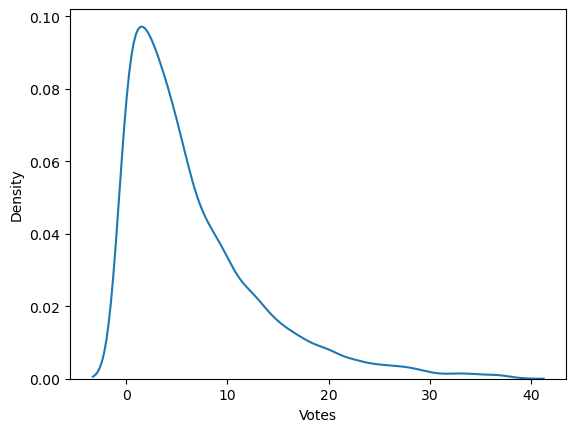

In [563]:
sns.kdeplot(dataset["Votes"])

In [564]:
dataset["Votes"] = np.sqrt(dataset["Votes"] )

<Axes: xlabel='Votes', ylabel='Density'>

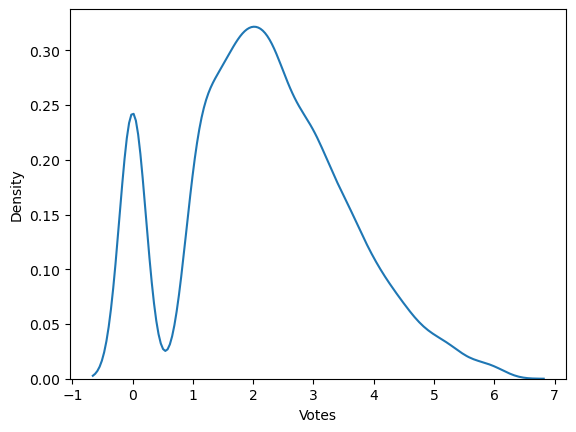

In [565]:
sns.kdeplot(dataset["Votes"])

* spliting data in to input and target

In [566]:
x = dataset.drop(["Average Cost for two"],axis=1)
x.head()

,Country Code,City,Longitude,Latitude,Currency,Price range,Aggregate rating,Votes,Country,Has Table booking_Yes,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
544,184,118,103.860005,1.282661,2,3,3.4,2.414736,8,0,...,0,1,0,0,0,0,0,0,0,0
545,184,118,103.859422,1.285477,2,3,4.0,2.396782,8,0,...,1,0,0,0,0,0,0,0,0,1
546,184,118,103.840360,1.279420,2,3,3.8,2.396782,8,0,...,0,0,0,0,1,0,1,0,0,0
547,184,118,103.841669,1.280503,2,3,3.1,2.414736,8,0,...,0,1,0,0,0,0,0,0,0,0
548,184,118,103.853605,1.293221,2,3,3.8,2.432299,8,0,...,0,0,0,0,1,0,1,0,0,0


In [567]:
y = dataset.loc[:,"Average Cost for two"]
y.head()

544    300
545    270
546    500
547     80
548    430
Name: Average Cost for two, dtype: int64

<Axes: >

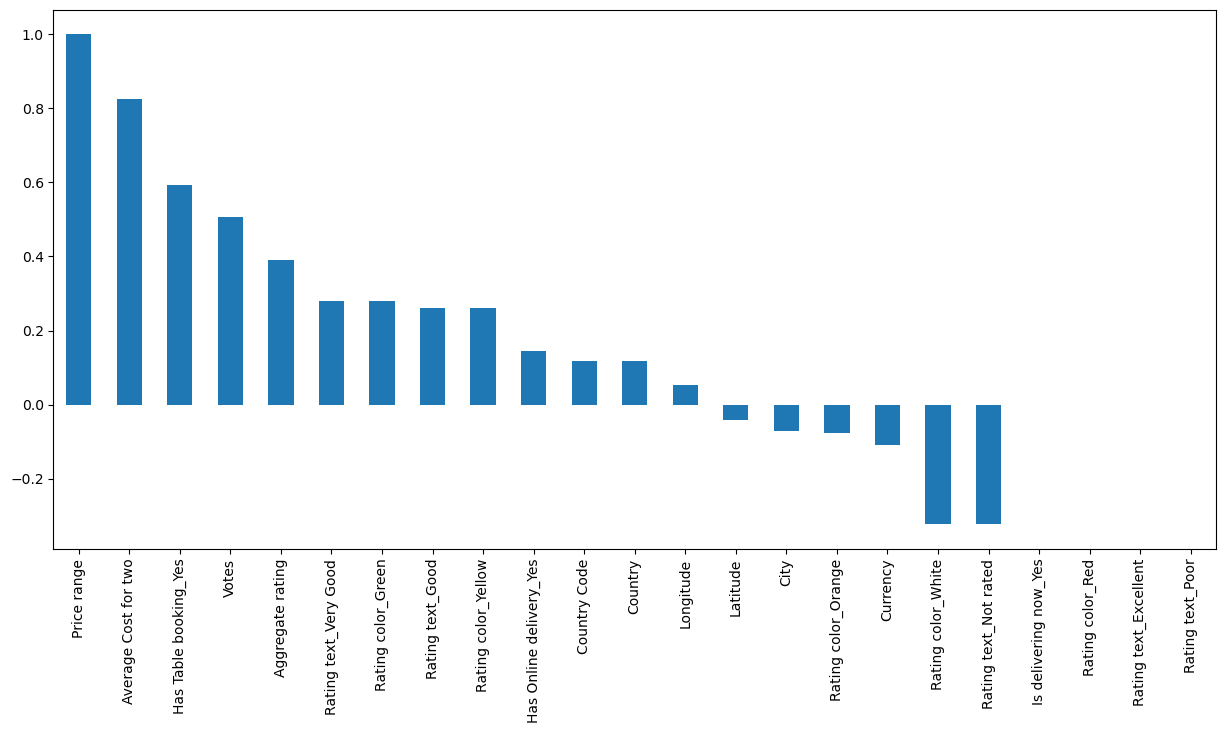

In [568]:
#### How other feature correleted with target variable
plt.figure(figsize=(15,7))
(dataset.corr()["Price range"].sort_values(ascending=[False])).plot.bar()

<Axes: >

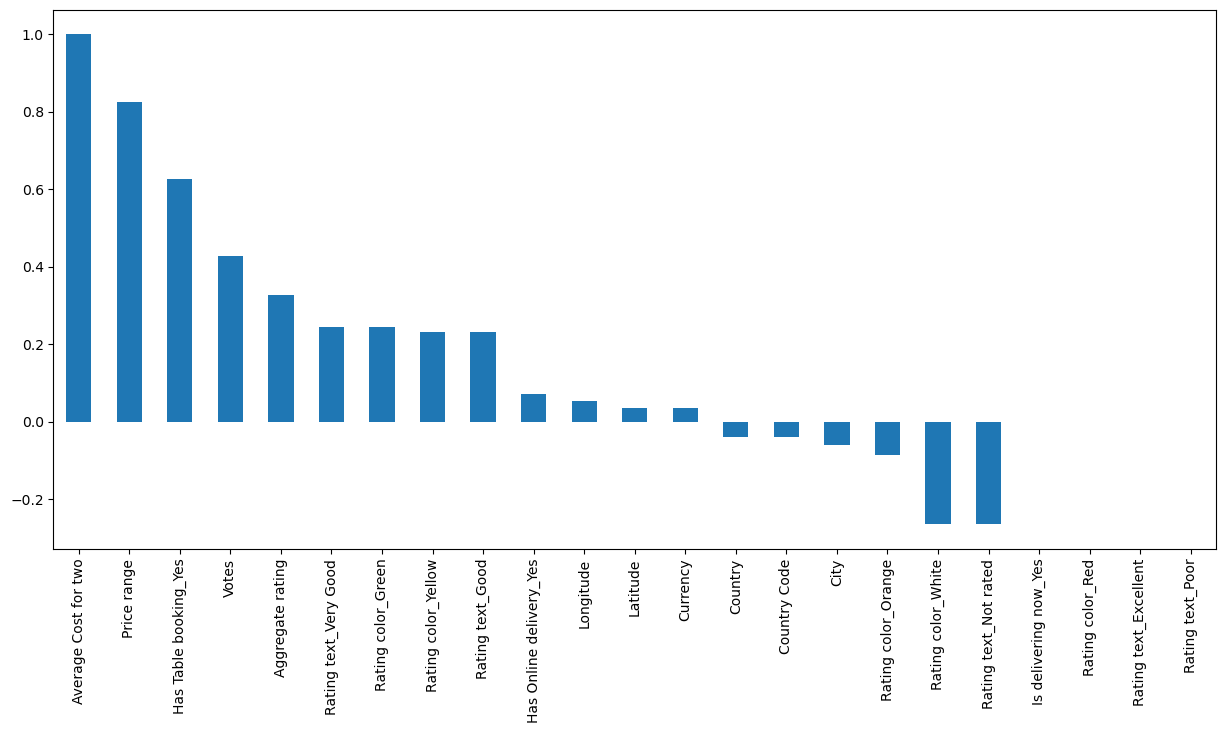

In [569]:
#### How other feature correleted with target variable
plt.figure(figsize=(15,7))
(dataset.corr()["Average Cost for two"].sort_values(ascending=[False])).plot.bar()

#### Feature seletion

In [570]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

In [571]:
selected_feature = SelectFromModel(Ridge(alpha=0.001))
selected_feature.fit(x,y)

SelectFromModel(estimator=Ridge(alpha=0.001))

In [572]:
selected_feature.get_support()

array([False, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False])

In [573]:
selected_feat = x.columns[(selected_feature.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 22
feature selected: 5


In [574]:
selected_feat

Index(['Currency', 'Price range', 'Country', 'Has Table booking_Yes',
       'Has Online delivery_Yes'],
      dtype='object')

In [575]:
x = x[selected_feat]
x.head()

,Currency,Price range,Country,Has Table booking_Yes,Has Online delivery_Yes
544,2,3,8,0,0
545,2,3,8,0,0
546,2,3,8,0,0
547,2,3,8,0,0
548,2,3,8,0,0


In [576]:
from sklearn.model_selection import train_test_split

In [577]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [578]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (5702, 5)
x_test: (2445, 5)
y_train: (5702,)
y_test: (2445,)


#### Feature scaling

from sklearn.preprocessing import minmax_scale

st = StandardScaler()
x_train1 = st.fit_transform(x_train)

x_train = pd.DataFrame(x_train1,columns=x_train.columns)
x_train.head()

### Model Bulding

#### Linear Rigression

In [579]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [580]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [581]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [582]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.7367682214626163
mean_absolute_error : 161.27356348494627
mean_squared_error : 84554.32246898407
<-------------------------Test------------------------------->
r2_score : 0.7081937933395441
mean_absolute_error : 174.97964273818602
mean_squared_error : 113479.92037573505


#### KNeighborsRegressor

In [583]:
from sklearn.neighbors import KNeighborsRegressor

In [584]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [585]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [586]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.8137867100036211
mean_absolute_error : 130.37285163100665
mean_squared_error : 59814.73307611365
<-------------------------Test------------------------------->
r2_score : 0.796023206653635
mean_absolute_error : 138.7914110429448
mean_squared_error : 79324.1190184049


#### RandomForestRegressor

In [587]:
from sklearn.ensemble import RandomForestRegressor

In [588]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [589]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [590]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.8285356055315746
mean_absolute_error : 126.68053634007013
mean_squared_error : 55077.14829261523
<-------------------------Test------------------------------->
r2_score : 0.8203752976448951
mean_absolute_error : 132.35675206007585
mean_squared_error : 69853.88403506741


#### GradientBoostingRegressor

In [591]:
from sklearn.ensemble import GradientBoostingRegressor

In [592]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [593]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [594]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.8285612466280414
mean_absolute_error : 126.54829155755577
mean_squared_error : 55068.91195598762
<-------------------------Test------------------------------->
r2_score : 0.8202570007844945
mean_absolute_error : 132.21112639069577
mean_squared_error : 69899.88825976368


#### AdaBoostRegressor

In [595]:
from sklearn.ensemble import AdaBoostRegressor

In [596]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [597]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [598]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.6763373840933469
mean_absolute_error : 154.61270826124075
mean_squared_error : 103965.68890195552
<-------------------------Test------------------------------->
r2_score : 0.7197877445204133
mean_absolute_error : 157.11731343218773
mean_squared_error : 108971.17235456596


#### XGBoostRegressor

In [599]:
from xgboost import XGBRegressor

In [600]:
xgr = XGBRegressor()
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [601]:
y_train_pred = xgr.predict(x_train)
y_test_pred = xgr.predict(x_test)

In [602]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.828571414499319
mean_absolute_error : 126.55531093941283
mean_squared_error : 55065.645870594715
<-------------------------Test------------------------------->
r2_score : 0.8202766894697742
mean_absolute_error : 132.30992296839054
mean_squared_error : 69892.23156711338


* I tried standerscaling and min max scaling but i got good result and ganrelized model without using scaling method

##### Final model

In [603]:
from sklearn.model_selection import GridSearchCV

In [604]:
parm = {
    'n_estimators' :  [100, 500, 900, 1100, 1500],
    'criterion' :  ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_features': ['sqrt', "log2", None]
    }

In [605]:
rf_cv = GridSearchCV(estimator=rf,param_grid=parm,verbose=1,scoring="r2",cv=5)
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 500, 900, 1100, 1500]},
             scoring='r2', verbose=1)

#### Saving Model

In [606]:
import joblib

In [607]:
joblib.dump(rf_cv,"Zomato_Restaurant_Regressor.obj")

['Zomato_Restaurant_Regressor.obj']

In [608]:
Zomato_Restaurant_Regressor = joblib.load("Zomato_Restaurant_Regressor.obj")

#### Pridection

In [609]:
y_train_pred = Zomato_Restaurant_Regressor.predict(x_train)
y_test_pred = Zomato_Restaurant_Regressor.predict(x_test)

In [610]:
print("<-------------------------Train------------------------------>")
print("r2_score :",r2_score(y_train,y_train_pred))
print("mean_absolute_error :",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error :",mean_squared_error(y_train,y_train_pred))

print("<-------------------------Test------------------------------->")
print("r2_score :",r2_score(y_test,y_test_pred))
print("mean_absolute_error :",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_test_pred))

<-------------------------Train------------------------------>
r2_score : 0.828549691710736
mean_absolute_error : 126.65782385903334
mean_squared_error : 55072.62358309198
<-------------------------Test------------------------------->
r2_score : 0.8204601576421031
mean_absolute_error : 132.34379631927467
mean_squared_error : 69820.8830038815


### Classifier

In [42]:
x= dataset.drop("Price range",axis=1)
x.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Aggregate rating,Votes,Country,Has Table booking_Yes,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
544,184,118,103.860005,1.282661,300,2,3.4,2.414736,8,0,...,0,1,0,0,0,0,0,0,0,0
545,184,118,103.859422,1.285477,270,2,4.0,2.396782,8,0,...,1,0,0,0,0,0,0,0,0,1
546,184,118,103.840360,1.279420,500,2,3.8,2.396782,8,0,...,0,0,0,0,1,0,1,0,0,0
547,184,118,103.841669,1.280503,80,2,3.1,2.414736,8,0,...,0,1,0,0,0,0,0,0,0,0
548,184,118,103.853605,1.293221,430,2,3.8,2.432299,8,0,...,0,0,0,0,1,0,1,0,0,0


In [43]:
y = dataset.loc[:,"Price range"]
y.head()

544    3
545    3
546    3
547    3
548    3
Name: Price range, dtype: int64

#### Feature seletion

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [45]:
selected_feature = SelectFromModel(Lasso(alpha=0.005))
selected_feature.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [46]:
selected_feature.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False])

In [47]:
selected_feat = x.columns[(selected_feature.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 22
feature selected: 8


In [48]:
selected_feat

Index(['Country Code', 'City', 'Longitude', 'Latitude', 'Average Cost for two',
       'Votes', 'Has Table booking_Yes', 'Has Online delivery_Yes'],
      dtype='object')

In [49]:
x = x[selected_feat]
x.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Votes,Has Table booking_Yes,Has Online delivery_Yes
544,184,118,103.860005,1.282661,300,2.414736,0,0
545,184,118,103.859422,1.285477,270,2.396782,0,0
546,184,118,103.840360,1.279420,500,2.396782,0,0
547,184,118,103.841669,1.280503,80,2.414736,0,0
548,184,118,103.853605,1.293221,430,2.432299,0,0


* spliting data into target and input variable

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
print("x_train:",x_train.shape,"|","y_train:",y_train.shape)
print("x_test:",x_test.shape,"|","y_test:",y_test.shape)
print(y_train.value_counts())

x_train: (6517, 8) | y_train: (6517,)
x_test: (1630, 8) | y_test: (1630,)
0    3346
1    2140
2     755
3     276
Name: Price range, dtype: int64


In [53]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [54]:
y_train.value_counts()

1    3346
0    3346
2    3346
3    3346
Name: Price range, dtype: int64

### Model Building

#### LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [56]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [58]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8822474596533174

confusion_matrix:
 [[3043  273   16   14]
 [  49 2962  257   78]
 [  16  184 2772  374]
 [   0    0  315 3031]]

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      3346
           1       0.87      0.89      0.88      3346
           2       0.82      0.83      0.83      3346
           3       0.87      0.91      0.89      3346

    accuracy                           0.88     13384
   macro avg       0.88      0.88      0.88     13384
weighted avg       0.88      0.88      0.88     13384

<-------------------test------------------------->
accuracy_score: 0.8815950920245399

confusion_matrix:
 [[768  78   5   3]
 [ 10 447  49   9]
 [  0   9 156  24]
 [  0   1   5  66]]

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       854
           1       0.84

#### knn

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [62]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9889420203227735

confusion_matrix:
 [[3339    7    0    0]
 [  25 3299   22    0]
 [   0   33 3298   15]
 [   0    0   46 3300]]

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3346
           1       0.99      0.99      0.99      3346
           2       0.98      0.99      0.98      3346
           3       1.00      0.99      0.99      3346

    accuracy                           0.99     13384
   macro avg       0.99      0.99      0.99     13384
weighted avg       0.99      0.99      0.99     13384

<-------------------test------------------------->
accuracy_score: 0.9846625766871165

confusion_matrix:
 [[850   4   0   0]
 [  0 510   5   0]
 [  0   7 176   6]
 [  0   0   3  69]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       0.98

#### svc

In [63]:
from sklearn.svm import SVC

In [64]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [65]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [66]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9305887627017334

confusion_matrix:
 [[3331   15    0    0]
 [  46 3279   20    1]
 [   3  258 3026   59]
 [   0    0  527 2819]]

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3346
           1       0.92      0.98      0.95      3346
           2       0.85      0.90      0.87      3346
           3       0.98      0.84      0.91      3346

    accuracy                           0.93     13384
   macro avg       0.93      0.93      0.93     13384
weighted avg       0.93      0.93      0.93     13384

<-------------------test------------------------->
accuracy_score: 0.9760736196319019

confusion_matrix:
 [[851   3   0   0]
 [  6 505   4   0]
 [  0  14 171   4]
 [  0   0   8  64]]

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       854
           1       0.97

#### RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [70]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 1.0

confusion_matrix:
 [[3346    0    0    0]
 [   0 3346    0    0]
 [   0    0 3346    0]
 [   0    0    0 3346]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3346
           1       1.00      1.00      1.00      3346
           2       1.00      1.00      1.00      3346
           3       1.00      1.00      1.00      3346

    accuracy                           1.00     13384
   macro avg       1.00      1.00      1.00     13384
weighted avg       1.00      1.00      1.00     13384

<-------------------test------------------------->
accuracy_score: 0.9914110429447853

confusion_matrix:
 [[852   2   0   0]
 [  0 509   6   0]
 [  0   1 185   3]
 [  0   0   2  70]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       0.99      0.99     

#### AdaBoostClassifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [73]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [74]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.5064255827854154

confusion_matrix:
 [[3346    0    0    0]
 [  56 3289    0    1]
 [   0 3328    0   18]
 [   0 3199    4  143]]

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3346
           1       0.34      0.98      0.50      3346
           2       0.00      0.00      0.00      3346
           3       0.88      0.04      0.08      3346

    accuracy                           0.51     13384
   macro avg       0.55      0.51      0.39     13384
weighted avg       0.55      0.51      0.39     13384

<-------------------test------------------------->
accuracy_score: 0.8355828220858895

confusion_matrix:
 [[854   0   0   0]
 [  8 507   0   0]
 [  0 187   0   2]
 [  0  71   0   1]]

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       854
           1       0.66

#### GradientBoostingClassifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [77]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [78]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.992901972504483

confusion_matrix:
 [[3346    0    0    0]
 [   8 3326   12    0]
 [   0   22 3306   18]
 [   0    0   35 3311]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3346
           1       0.99      0.99      0.99      3346
           2       0.99      0.99      0.99      3346
           3       0.99      0.99      0.99      3346

    accuracy                           0.99     13384
   macro avg       0.99      0.99      0.99     13384
weighted avg       0.99      0.99      0.99     13384

<-------------------test------------------------->
accuracy_score: 0.9871165644171779

confusion_matrix:
 [[854   0   0   0]
 [  2 504   9   0]
 [  1   3 182   3]
 [  0   0   3  69]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       0.99 

##### Final model

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "n_estimators" : [100,300,500,800,1000],
    "max_features" : ["sqrt", "log2", None],
}

In [83]:
rfc_cv = GridSearchCV(estimator=rfc,param_grid=param,cv=5,scoring="f1",verbose=1)
rfc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='f1', verbose=1)

#### Saving model

In [84]:
import joblib

In [85]:
joblib.dump(rfc_cv,"Zomato_Restaurant_c.obj")

['Zomato_Restaurant_c.obj']

In [86]:
Zomato_Restaurant_c = joblib.load("Zomato_Restaurant_c.obj")

In [87]:
y_train_pred = Zomato_Restaurant_c.predict(x_train)
y_test_pred = Zomato_Restaurant_c.predict(x_test)

In [88]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 1.0

confusion_matrix:
 [[3346    0    0    0]
 [   0 3346    0    0]
 [   0    0 3346    0]
 [   0    0    0 3346]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3346
           1       1.00      1.00      1.00      3346
           2       1.00      1.00      1.00      3346
           3       1.00      1.00      1.00      3346

    accuracy                           1.00     13384
   macro avg       1.00      1.00      1.00     13384
weighted avg       1.00      1.00      1.00     13384

<-------------------test------------------------->
accuracy_score: 0.99079754601227

confusion_matrix:
 [[852   2   0   0]
 [  0 507   8   0]
 [  0   1 185   3]
 [  0   0   1  71]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       0.99      0.98      0